In [ ]:
comments_info = comments_info[comments_info.predicted != 0]

In [ ]:
comments_info.info() #from 2.176.363 to 1.421.973 (popular) comments

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421973 entries, 16 to 2176363
Data columns (total 36 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   approveDate            1421973 non-null  int64  
 1   articleID              1421973 non-null  object 
 2   articleWordCount       1421973 non-null  float64
 3   commentBody            1421973 non-null  object 
 4   commentID              1421973 non-null  float64
 5   commentSequence        1421973 non-null  float64
 6   commentTitle           1379712 non-null  object 
 7   commentType            1421973 non-null  object 
 8   createDate             1421973 non-null  float64
 9   depth                  1421973 non-null  float64
 10  editorsSelection       1421973 non-null  int64  
 11  inReplyTo              1421973 non-null  float64
 12  newDesk                1421973 non-null  object 
 13  parentID               1421973 non-null  float64
 14  parentUserDisplay

In [ ]:
inner_join = pd.merge(left=df_dominant_topic, right=comments_info, left_on='articleID', right_on='articleID')

In [ ]:
inner_join

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,articleID,approveDate,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial,y,predicted
0,0,57.0,0.3352,"abuse, drug, traffic, opioids, opiates, epidem...","[opioids, opiates, drug, abuse, traffic, unite...",5adb8334068401528a2a9f74,1524428703,1571.0,Thank you for a well-balanced presentation of ...,26831654.0,26831654.0,<br/>,comment,1.524420e+09,1.0,0,0.0,Editorial,0.0,NaN,26831654,http://graphics8.nytimes.com/images/apps/times...,10.0,8.0,NaN,0.0,NaN,Sunday Review,0,approved,1.0,0.0,1524428703,serenity,690130.0,california,NaN,NaN,Editorial,0,1
1,0,57.0,0.3352,"abuse, drug, traffic, opioids, opiates, epidem...","[opioids, opiates, drug, abuse, traffic, unite...",5adb8334068401528a2a9f74,1524428676,1571.0,Fight amongst yourselves. Excuse me while inje...,26831251.0,26831251.0,<br/>,comment,1.524416e+09,1.0,0,0.0,Editorial,0.0,NaN,26831251,http://graphics8.nytimes.com/images/apps/times...,10.0,1.0,NaN,0.0,NaN,Sunday Review,0,approved,1.0,0.0,1524428676,Jean,67292551.0,Los Angeles,NaN,NaN,Editorial,0,1
2,0,57.0,0.3352,"abuse, drug, traffic, opioids, opiates, epidem...","[opioids, opiates, drug, abuse, traffic, unite...",5adb8334068401528a2a9f74,1524427057,1571.0,During AIDS crisis no plans of mass quarantine...,26831451.0,26831451.0,<br/>,comment,1.524418e+09,1.0,0,0.0,Editorial,0.0,NaN,26831451,http://graphics8.nytimes.com/images/apps/times...,10.0,8.0,NaN,0.0,NaN,Sunday Review,0,approved,1.0,0.0,1524427057,Bulgakov's Cat,67115499.0,"Bean fields to the left, corn to the right",NaN,NaN,Editorial,0,1
3,0,57.0,0.3352,"abuse, drug, traffic, opioids, opiates, epidem...","[opioids, opiates, drug, abuse, traffic, unite...",5adb8334068401528a2a9f74,1524424759,1571.0,"We've had a ""drug problem"" in the Untied State...",26831724.0,26831724.0,<br/>,comment,1.524420e+09,1.0,0,0.0,Editorial,0.0,NaN,26831724,http://graphics8.nytimes.com/images/apps/times...,10.0,6.0,NaN,0.0,NaN,Sunday Review,0,approved,1.0,0.0,1524424759,Trina,42660931.0,Indiana,NaN,NaN,Editorial,0,1
4,0,57.0,0.3352,"abuse, drug, traffic, opioids, opiates, epidem...","[opioids, opiates, drug, abuse, traffic, unite...",5adb8334068401528a2a9f74,1524423091,1571.0,The NYT editors begin with some very important...,26831320.0,26831320.0,<br/>,comment,1.524417e+09,1.0,0,0.0,Editorial,0.0,NaN,26831320,https://s3.amazonaws.com/pimage.timespeople.ny...,10.0,8.0,NaN,0.0,NaN,Sunday Review,0,approved,1.0,0.0,1524423091,Wherever Hugo,58937383.0,"There, UR",NaN,NaN,Editorial,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418721,9334,29.0,0.3347,"theater, play, transportation, lee, evans, tee...","[theater, tony, awards, theater, awards, ameri...",5ae82ca3068401528a2ab97a,1525188962,2055.0,"Kiddie books, characters, cartoon idiocy. Poo...",26931540.0,26931540.0,<br/>,comment,1.525181e+09,1.0,0,0.0,Culture,0.0,NaN,26931540,http://graphics8.nytimes.com/images/apps/times...,0.0,19.0,NaN,0.0,NaN,Unknown,0,approved,1.0,0.0,1525188962,Betsy Herring,59790721.0,"Edmond, OK",NaN,NaN,News,0,1
1418722,9334,29.0,0.3347,"theater, play, transportation, lee, evans, tee...","[theater, tony, awards, theater, awards, ameri...",5ae82ca3068401528a2ab97a,1525188339,2055.0,"so, this is Broadway now?...SpongeBob, Frozen,...",26931921.0,26931921.0,<br/>,comment,1.525182e+09,1.0,0,0.0,Culture,0.0,NaN,26931921,http://graphics8.nytimes.com/images/apps/times...,0.0,25.0,NaN,0.0,NaN,Unknown,0,approved,1.0,0.0,1525188339,Jim,57128966.0,NH,NaN,NaN,News,0,1
1418723,9334,29.0,0.3347,"theater, play, transportation, lee, evans

In [ ]:
comments_per_topic = inner_join.groupby('Dominant_Topic').sum()

In [ ]:
df_topics = pd.DataFrame(inner_join['Dominant_Topic'].unique()) #len 50

In [ ]:
df_topics = df_topics.sort_values(by=0)

In [ ]:
d = []
for i in inner_join['Dominant_Topic'].unique():
  df = [x for x, e in enumerate(inner_join['Dominant_Topic'].squeeze()) if e == i]
  d.append(df)

In [ ]:
number_of_comments=[]
for i in range(len(d)):
  l = len(d[i])
  number_of_comments.append(l)

In [ ]:
df_topics['number_of_comments'] = pd.DataFrame(number_of_comments)

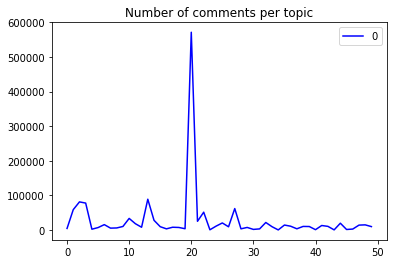

In [ ]:
pd.DataFrame(number_of_comments).plot(color='blue', title='Number of comments per topic')

In [ ]:
df_topics[df_topics['number_of_comments'] >= 30000] #topics have been reindexed

,0,number_of_comments
22,0.0,51595
2,15.0,81352
1,16.0,58923
10,22.0,33580
27,23.0,62059
13,30.0,89055
3,34.0,77938
20,50.0,571711


In [ ]:
def remove_stopwords(texts):
    return [[word.lower() for word in simple_preprocess(str(doc)) if word not in stop_words_en] for doc in texts]

In [ ]:
cleaned_comments = remove_stopwords(inner_join['commentBody'])

In [ ]:
from textblob import TextBlob

In [ ]:
##
blob_0=[]
for i in d[22]:
  blob = TextBlob(str(cleaned_comments[i]))
  blob_0.append(blob)
sentiment0=[]
for sent in blob_0:
  sentiment0.append(sent.sentiment.polarity)

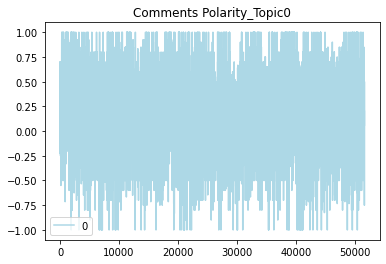

In [ ]:
df0 = pd.DataFrame(sentiment0)
df0.plot(color='lightblue', title='Comments Polarity_Topic0')

In [ ]:
len(d[22]) #topic 0

51595

In [ ]:
model.show_topic(0)

[('inc', 0.92693055),
 ('diet', 0.029002342),
 ('nutrition', 0.029002342),
 ('education', 1.3934357e-06),
 ('back', 1.3933817e-06),
 ('city', 1.3933807e-06),
 ('nyc', 1.393379e-06),
 ('roots', 1.3933749e-06),
 ('department', 1.3933737e-06),
 ('company', 1.3933723e-06)]

In [ ]:
blob_15=[]
for i in d[2]:
  blob = TextBlob(str(cleaned_comments[i]))
  blob_15.append(blob)
sentiment15=[]
for sent in blob_15:
  sentiment15.append(sent.sentiment.polarity)

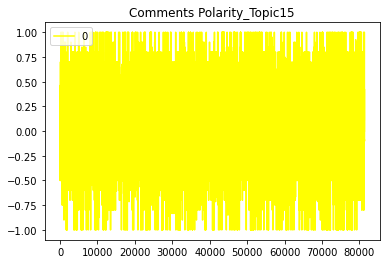

In [ ]:
df15 = pd.DataFrame(sentiment15)
df15.plot(color='yellow', title='Comments Polarity_Topic15')

In [ ]:
model.show_topic(15)

[('international', 0.16100113),
 ('united', 0.15165763),
 ('relations', 0.14352131),
 ('states', 0.14168668),
 ('defense', 0.092441835),
 ('forces', 0.07267855),
 ('military', 0.07224995),
 ('korea', 0.065507516),
 ('south', 0.03801068),
 ('conflicts', 0.0135026425)]

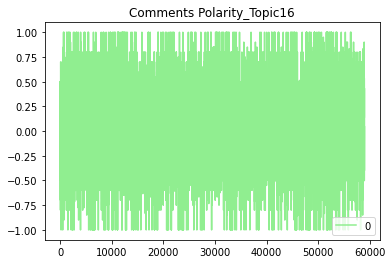

In [ ]:
blob_16=[]
for i in d[1]:
  blob = TextBlob(str(cleaned_comments[i]))
  blob_16.append(blob)
sentiment16=[]
for sent in blob_16:
  sentiment16.append(sent.sentiment.polarity)
df16 = pd.DataFrame(sentiment16)
df16.plot(color='lightgreen', title='Comments Polarity_Topic16')

In [ ]:
model.show_topic(16)

[('trump', 0.13067777),
 ('us', 0.11803436),
 ('russian', 0.116555445),
 ('ties', 0.11434316),
 ('associates', 0.11434316),
 ('interference', 0.11434316),
 ('robert', 0.09071405),
 ('cohen', 0.061739612),
 ('mueller', 0.04967921),
 ('organization', 0.025526984)]

In [ ]:

blob_22=[]
for i in d[10]:
  blob = TextBlob(str(cleaned_comments[i]))
  blob_22.append(blob)
sentiment22=[]
for sent in blob_22:
  sentiment22.append(sent.sentiment.polarity)

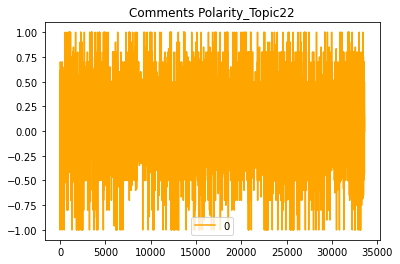

In [ ]:
df22 = pd.DataFrame(sentiment22)
df22.plot(color='orange', title='Comments Polarity_Topic22')

In [ ]:
model.show_topic(22)

[('news', 0.22383721),
 ('media', 0.21772727),
 ('war', 0.12373609),
 ('social', 0.09226819),
 ('facebook', 0.0685817),
 ('times', 0.05575592),
 ('afghanistan', 0.038026832),
 ('islam', 0.031725388),
 ('muslims', 0.028251285),
 ('pregnancy', 0.023808107)]

In [ ]:
blob_23=[]
for i in d[27]:
  blob = TextBlob(str(cleaned_comments[i]))
  blob_23.append(blob)
sentiment23=[]
for sent in blob_23:
  sentiment23.append(sent.sentiment.polarity)

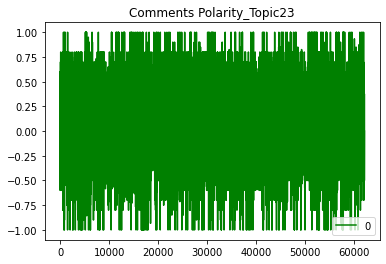

In [ ]:
df23 = pd.DataFrame(sentiment23)
df23.plot(color='green', title='Comments Polarity_Topic23')

In [ ]:
model.show_topic(23)

[('presidential', 0.12558948),
 ('election', 0.12409936),
 ('iii', 0.11348294),
 ('donald', 0.11145652),
 ('intelligence', 0.10705252),
 ('russia', 0.10264298),
 ('trump', 0.08674742),
 ('services', 0.07943225),
 ('espionage', 0.059887007),
 ('jefferson', 0.042109143)]

In [ ]:
blob_30=[]
for i in d[13]:
  blob = TextBlob(str(cleaned_comments[i]))
  blob_30.append(blob)
sentiment30=[]
for sent in blob_30:
  sentiment30.append(sent.sentiment.polarity)

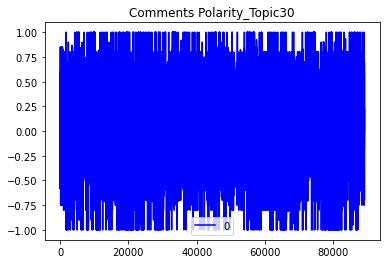

In [ ]:
df30 = pd.DataFrame(sentiment30)
df30.plot(color='blue', title='Comments Polarity_Topic30')

In [ ]:
model.show_topic(30)

[('care', 0.10837327),
 ('health', 0.10287363),
 ('democratic', 0.09942064),
 ('act', 0.09742873),
 ('queens', 0.07869434),
 ('restaurant', 0.0678675),
 ('insurance', 0.06655528),
 ('restaurants', 0.06210744),
 ('managed', 0.056635182),
 ('global', 0.04982287)]

In [ ]:
##
blob_34=[]
for i in d[3]:
  blob = TextBlob(str(cleaned_comments[i]))
  blob_34.append(blob)
sentiment34=[]
for sent in blob_34:
  sentiment34.append(sent.sentiment.polarity)

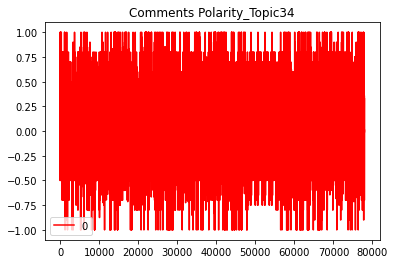

In [ ]:
df34 = pd.DataFrame(sentiment34)
df34.plot(color='red', title='Comments Polarity_Topic34')

In [ ]:
model.show_topic(34)

[('government', 0.29914102),
 ('politics', 0.29102463),
 ('states', 0.21259795),
 ('united', 0.19313724),
 ('education', 3.7929897e-07),
 ('gps', 3.7915217e-07),
 ('pencil', 3.7915217e-07),
 ('pencils', 3.7915217e-07),
 ('celiac', 3.7915217e-07),
 ('dreams', 3.7915217e-07)]

In [ ]:
##
blob_50=[]
for i in d[20]:
  blob = TextBlob(str(cleaned_comments[i]))
  blob_50.append(blob)
sentiment50=[]
for sent in blob_50:
  sentiment50.append(sent.sentiment.polarity)

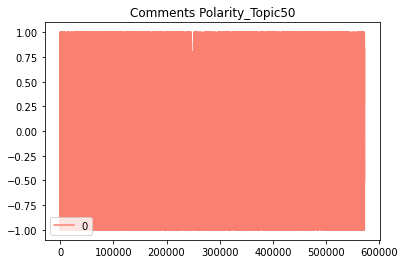

In [ ]:
df50 = pd.DataFrame(sentiment50)
df50.plot(color='salmon', title='Comments Polarity_Topic50')

In [ ]:
model.show_topic(50)

[('trump', 0.19449243),
 ('donald', 0.18921395),
 ('states', 0.17045084),
 ('united', 0.17021677),
 ('politics', 0.1411163),
 ('government', 0.1333679),
 ('fusion', 1.0562922e-07),
 ('pencil', 1.0562922e-07),
 ('dreams', 1.0562922e-07),
 ('gps', 1.0562922e-07)]